<h1>LSTM을 이용한 로이터 뉴스 카테고리 분류하기</h1>

In [16]:
from tensorflow.keras.datasets import reuters
from tensorflow.keras.preprocessing.text import text_to_word_sequence
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Embedding, Dense, LSTM
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential

import numpy as np 
import matplotlib.pyplot as plt

In [21]:
(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words = 1000, test_split = 0.2)
# num_words = 1000 > 빈도가 1~1000에 해당하는 단어만 출력

# 데이터 확인 및 출력
category = np.max(y_train) + 1
print(category, '카테고리')
print(len(x_train), '학습용 뉴스 기사')
print(len(x_test), '테스트용 뉴스 기사')
print(x_train[0])

46 카테고리
8982 학습용 뉴스 기사
2246 테스트용 뉴스 기사
[1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 2, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 2, 2, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 2, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]


In [22]:
# 단어의 수 맞추기
x_train = sequence.pad_sequences(x_train, maxlen = 100)
x_test = sequence.pad_sequences(x_test, maxlen = 100)

# 원-핫 인코딩
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# 모델의 구조 설계
model = Sequential()
model.add(Embedding(1000, 100))
model.add(LSTM(100, activation = 'tanh'))
model.add(Dense(46, activation = 'softmax'))

model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
early_stopping_callback = EarlyStopping(monitor = 'val_loss', patience = 5)

history = model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs = 200, batch_size = 20,
                   callbacks = [early_stopping_callback])

print("\n Test Accuracy: %.4f" % (model.evaluate(x_test, y_test)[1]))

Epoch 1/200
450/450 [==============================] - 21s 43ms/step - loss: 2.1835 - accuracy: 0.4350 - val_loss: 1.8773 - val_accuracy: 0.5129
Epoch 2/200
450/450 [==============================] - 19s 43ms/step - loss: 1.8135 - accuracy: 0.5367 - val_loss: 1.7040 - val_accuracy: 0.5686
Epoch 3/200
450/450 [==============================] - 19s 43ms/step - loss: 1.6157 - accuracy: 0.5828 - val_loss: 1.6073 - val_accuracy: 0.5868
Epoch 4/200
450/450 [==============================] - 20s 44ms/step - loss: 1.4403 - accuracy: 0.6340 - val_loss: 1.4728 - val_accuracy: 0.6037
Epoch 5/200
450/450 [==============================] - 19s 43ms/step - loss: 1.2953 - accuracy: 0.6694 - val_loss: 1.3252 - val_accuracy: 0.6638
Epoch 6/200
450/450 [==============================] - 19s 43ms/step - loss: 1.1719 - accuracy: 0.7024 - val_loss: 1.2322 - val_accuracy: 0.6883
Epoch 7/200
450/450 [==============================] - 22s 48ms/step - loss: 1.0817 - accuracy: 0.7247 - val_loss: 1.2153 - val_ac

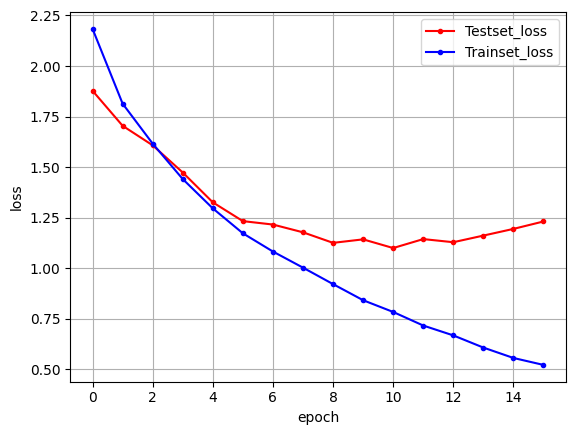

In [23]:
y_val_loss = history.history['val_loss']
y_loss = history.history['loss']

x_len = np.arange(len(y_loss))

plt.plot(x_len, y_val_loss, marker = '.', c = "red", label = 'Testset_loss')
plt.plot(x_len, y_loss, marker = '.', c = "blue", label = 'Trainset_loss')

plt.legend(loc = 'upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()